# Avocado Prices

Historical data on avocado prices and sales volume in multiple US markets
여러 미국 시장의 아보카도 가격 및 판매량에 대한 과거 데이터

이 데이터는 2018년 5월에 Hass Avocado Board 웹사이트에서 다운로드되어 단일 CSV로 컴파일되었다. Hass Avocado Board는 웹사이트에 있는 데이터를 다음과 같이 설명한다.

아래 표는 전국 소매량(단위) 및 가격에 대한 2018년 매주 소매 스캔 데이터를 나타낸다. 소매 스캔 데이터는 Hass avocado의 실제 소매 판매를 기준으로 소매업체의 현금 레지스터에서 직접 나온다. 2013년부터 시작된 아래 표에는 확장된 멀티 아웃렛 소매 데이터 세트가 반영되어 있다. 멀티 아웃렛 보고에는 식료품, 매스, 클럽, 마약, 달러 및 군사 채널의 집계가 포함된다. 표의 평균 가격(아보카도)은 여러 개(아보카도)를 가방에 담아 판매해도 단위당(아보카도당) 비용을 반영한다. 표의 제품 조회 코드(PLU)는 Hass avocados 전용이다. 다른 종류의 아보카도(예: 그린스킨)는 이 표에 포함되지 않는다.

**Data**


*   Data - 관찰 날짜
*   AveragePrice - 단일 아보카도의 평균가격
*   type - 재래식 또는 유기식
*   year - 년도
*   Region - 관측치의 도시 또는 지역
*   Total Volume - 판매된 총 아보카도 수
*   4046 - PLU 4046이 판매된 총 아보카도 수
*   4225 - PLU 4225가 판매된 총 아보카도 수
*   4770 - PLU 4770이 판매된 총 아보카도 수

참고자료 : https://www.kaggle.com/neuromusic/avocado-prices

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [66]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [67]:
# indes_col = 0을 사용하여 Unnamed: 0을 제거
data = pd.read_csv('avocado.csv', index_col = 0)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [68]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [70]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [71]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

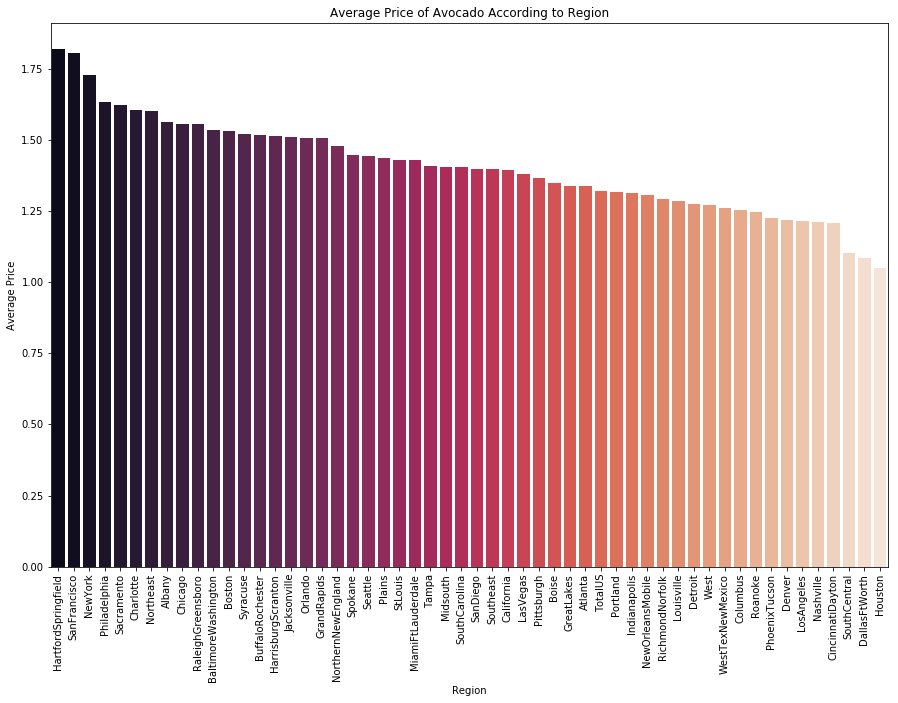

In [72]:
# 지역별 아보카도 시각화하기
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price, palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

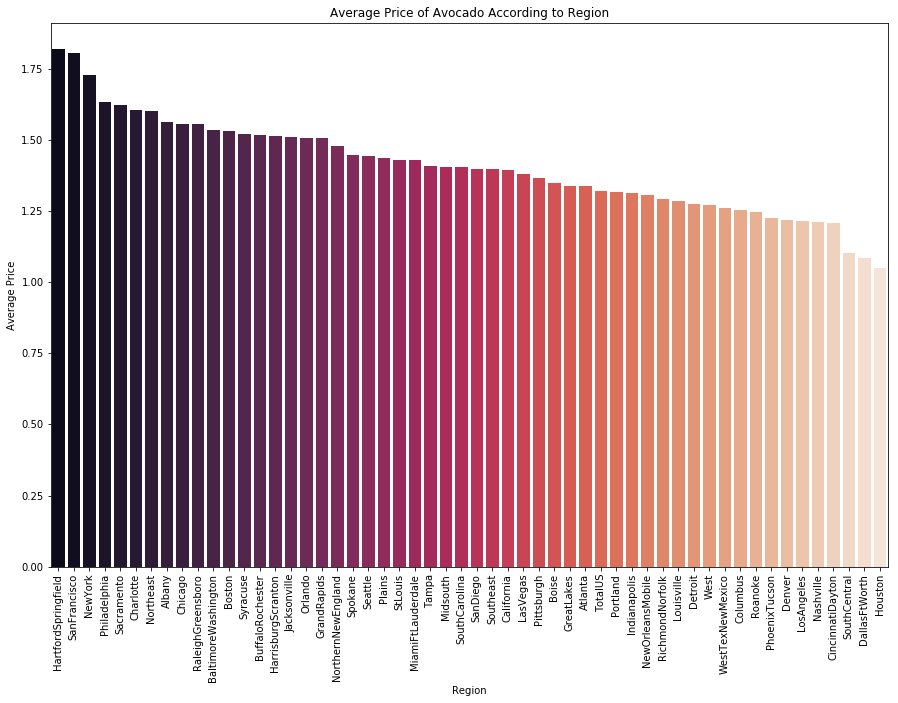

In [73]:
# 유형별 아보카도 가격(재래식, 유기농식)
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [74]:
# 지역별 총 아보카도 판매수
filter1 = data.region!='TotalUS' # data2 = data2[data2.region!='TotalUS']
filter1.head()

0    True
1    True
2    True
3    True
4    True
Name: region, dtype: bool

In [75]:
data['region'].value_counts()

Charlotte              338
Orlando                338
HarrisburgScranton     338
SanFrancisco           338
Roanoke                338
Sacramento             338
DallasFtWorth          338
NewOrleansMobile       338
Nashville              338
West                   338
Syracuse               338
GrandRapids            338
PhoenixTucson          338
Tampa                  338
NewYork                338
Denver                 338
Indianapolis           338
Albany                 338
Louisville             338
GreatLakes             338
Boise                  338
BaltimoreWashington    338
LasVegas               338
California             338
Houston                338
Spokane                338
HartfordSpringfield    338
Pittsburgh             338
Portland               338
RichmondNorfolk        338
NorthernNewEngland     338
CincinnatiDayton       338
Seattle                338
SouthCentral           338
Boston                 338
SouthCarolina          338
Northeast              338
C

In [76]:
data['Total Bags'].value_counts()

0.00          15
300.00         5
990.00         5
916.67         4
266.67         4
550.00         4
856.67         3
153.33         3
196.67         3
803.33         3
286.67         3
2110.00        3
880.00         3
106.67         3
846.67         3
436.67         3
263.33         3
260.00         3
453.33         3
613.33         3
3205.37        2
1350.00        2
293.33         2
38987.77       2
403.33         2
270.00         2
2533.33        2
523.33         2
696.67         2
1634.13        2
              ..
4516.49        1
469278.11      1
82836.10       1
46097.43       1
4431.28        1
3657.76        1
970.09         1
983840.70      1
243.63         1
57394.95       1
9670.10        1
1419928.75     1
4107.09        1
63457.85       1
8238.12        1
45081.61       1
12389.26       1
84548.09       1
758.81         1
66806.13       1
392890.13      1
76357.84       1
799.44         1
20464.55       1
81549.13       1
155484.69      1
224912.37      1
613.16        

Text(0.5, 1.0, 'Most Common Average Price')

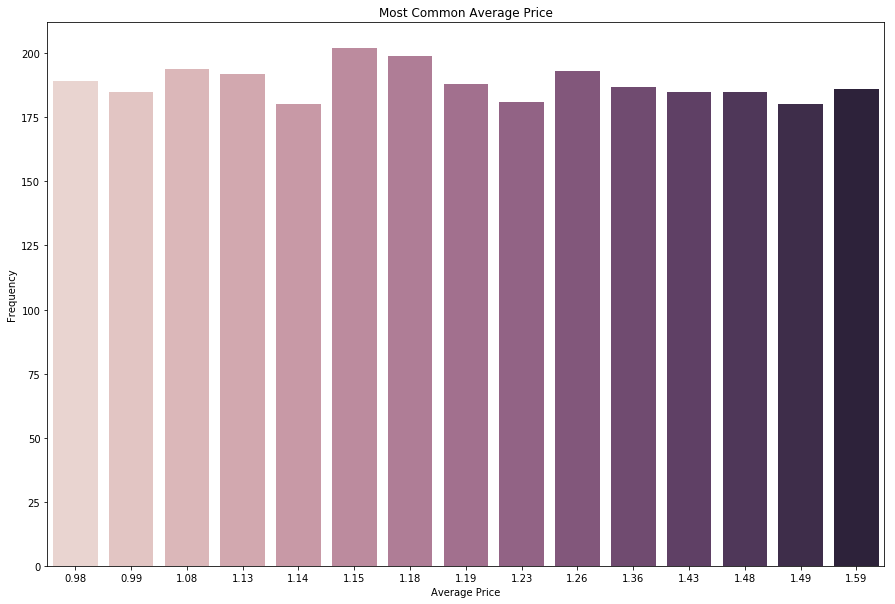

In [77]:
# data['AveragePrice']=data['AveragePrice'].astype(int)은 1, 0으로 원핫인코딩 해주는 것이다.
avgprice_count=Counter(data.AveragePrice)
most_common_type=avgprice_count.most_common(15)
x,y = zip(*most_common_type)
x,y = list(x),list(y)
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Most Common Average Price')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

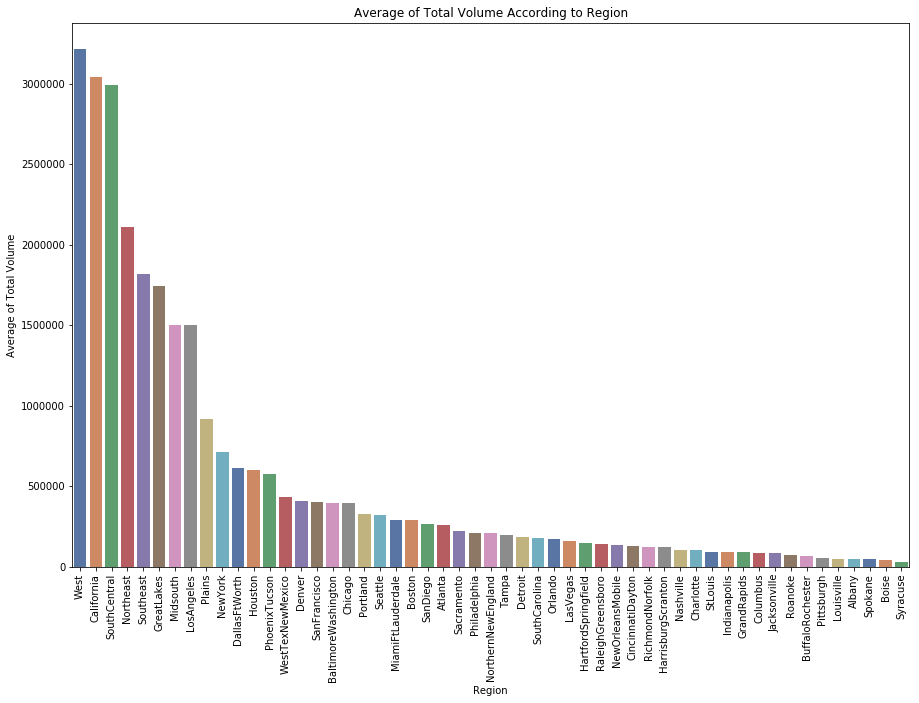

In [78]:
# 지역별 총 볼륨 평균 시각화
data1 = data[filter1]
region_list = list(data1.region.unique())
average_total_volume = []

# 비율을 구하기 위해서 len(x)으로 나눔
for i in region_list:
    x=data1[data1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume,palette='deep')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Types')

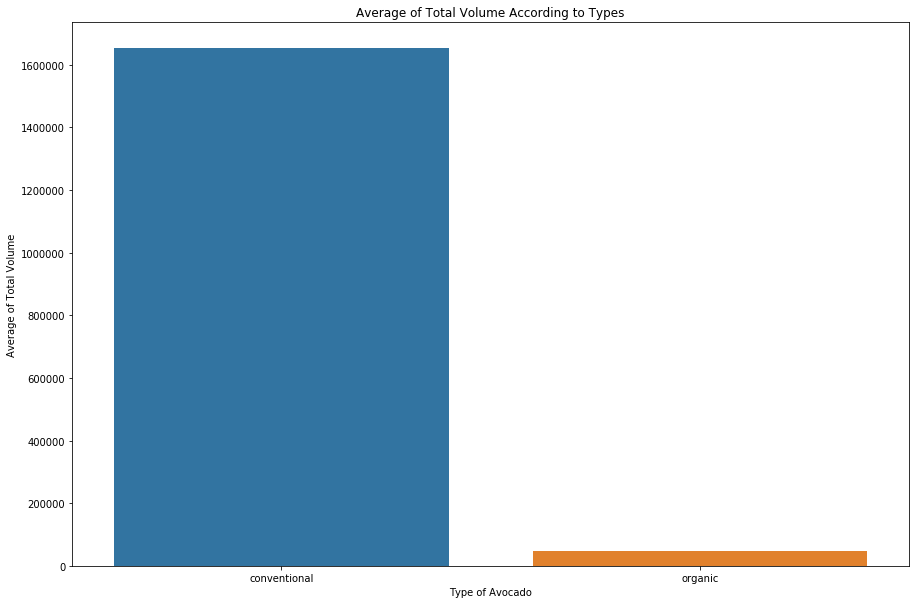

In [79]:
# 유형별 총량 아보카도 평균가격 시각화
type_list1=list(data.region.unique())
average_total_volume1=[]

for i in type_list:
    x=data[data.type==i]
    average_total_volume1.append(sum(x['Total Volume']/len(x)))
df4=pd.DataFrame({'type_list':type_list,'average_total_volume1':average_total_volume1})

plt.figure(figsize=(15,10))
ax=sns.barplot(x=df4.type_list,y=df4.average_total_volume1)
plt.xlabel('Type of Avocado')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Types')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


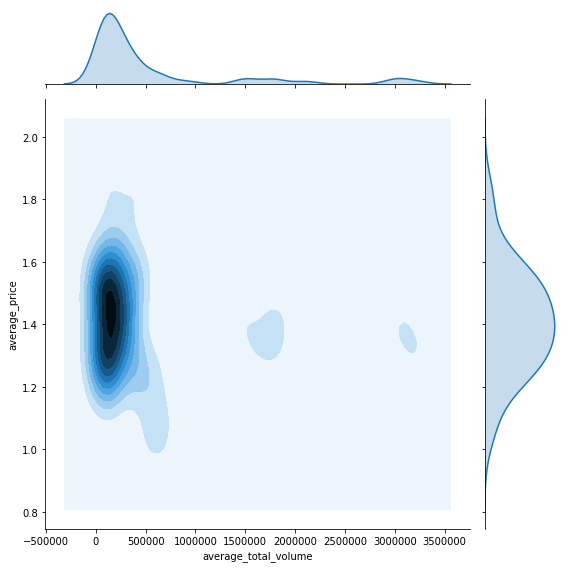

In [80]:
# 총량 vs 평균가격
datab=pd.concat([df3,df1.average_price],axis=1)
j1=sns.jointplot('average_total_volume','average_price',data=datab,kind='kde',size=8)
plt.show()

<Figure size 720x720 with 0 Axes>

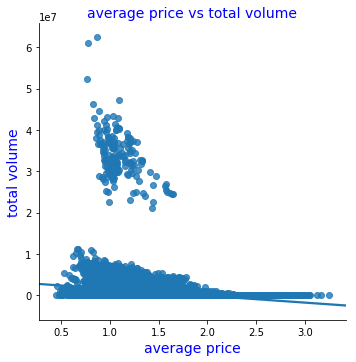

In [81]:
# 평균가격 vs 총량
plt.figure(figsize=(10,10))
sns.lmplot('AveragePrice','Total Volume',data=data)
plt.xlabel('average price',color='blue',fontsize=14)
plt.ylabel('total volume',color='blue',fontsize=14)
plt.title('average price vs total volume',color='blue',fontsize=14)
plt.show()

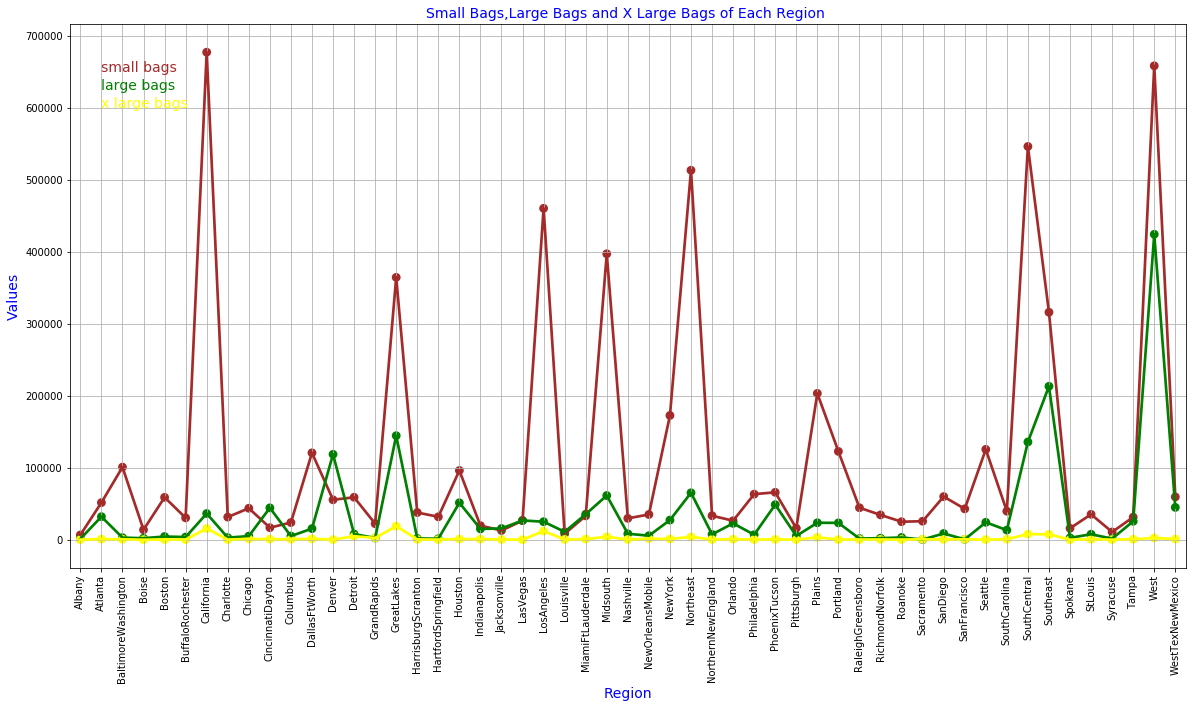

In [82]:
# 지역별 작은가방, 큰가방, x-라지가방에 담긴 가격(아보카도)
small=[]
large=[]
xlarge=[]

for i in region_list:
    x=data[data.region==i]
    small.append(sum(x['Small Bags'])/len(x))
    large.append(sum(x['Large Bags'])/len(x))
    xlarge.append(sum(x['XLarge Bags'])/len(x))
df5=pd.DataFrame({'region_list':region_list,'small':small,'large':large,'xlarge':xlarge})

f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=region_list,y=small,data=df5,color='brown',alpha=0.7)
sns.pointplot(x=region_list,y=large,data=df5,color='green',alpha=0.7)
sns.pointplot(x=region_list,y=xlarge,data=df5,color='yellow',alpha=0.7)

plt.xticks(rotation=90)
plt.text(1,650000,'small bags',color='brown',fontsize=14)
plt.text(1,625000,'large bags',color='green',fontsize=14)
plt.text(1,600000,'x large bags', color='yellow',fontsize=14)

plt.xlabel('Region',color='blue',fontsize=14)
plt.ylabel('Values',color='blue',fontsize=14)
plt.title('Small Bags,Large Bags and X Large Bags of Each Region ',color='blue',fontsize=14)
plt.grid()

[Text(0, 0.5, 'region'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Size of Bags")]

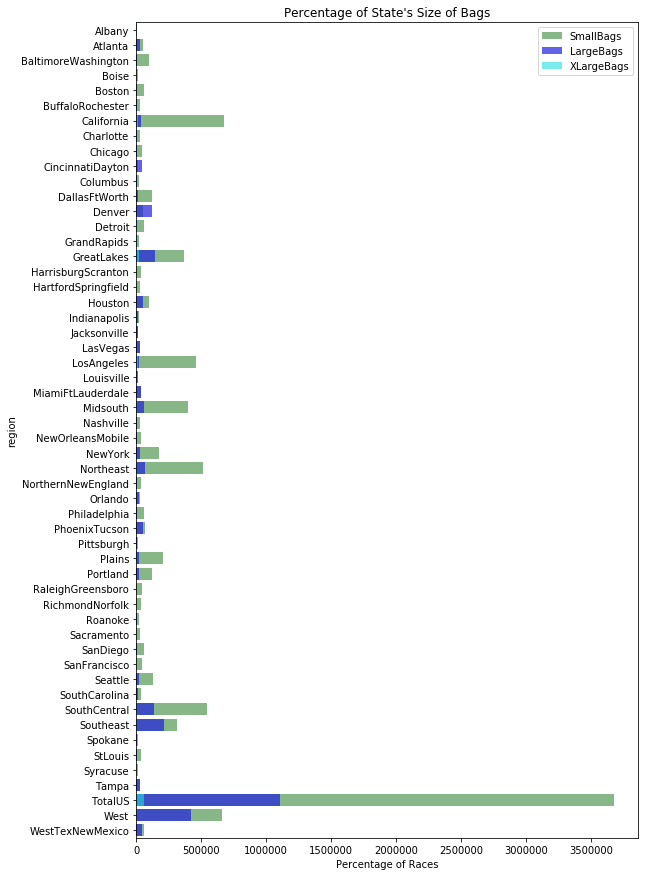

In [83]:
region_list=list(data.region.unique())
SmallBags=[]
LargeBags=[]
XLargeBags=[]

for i in region_list:
    x=data[data.region == i]
    SmallBags.append(sum(x['Small Bags'])/len(x))
    LargeBags.append(sum(x['Large Bags'])/len(x))
    XLargeBags.append(sum(x['XLarge Bags'])/len(x))
    
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=SmallBags,y=region_list,color='green',alpha = 0.5,label='SmallBags' )
sns.barplot(x=LargeBags,y=region_list,color='blue',alpha = 0.7,label='LargeBags')
sns.barplot(x=XLargeBags,y=region_list,color='cyan',alpha = 0.6,label='XLargeBags')
ax.legend(loc='upper right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='region',title = "Percentage of State's Size of Bags")

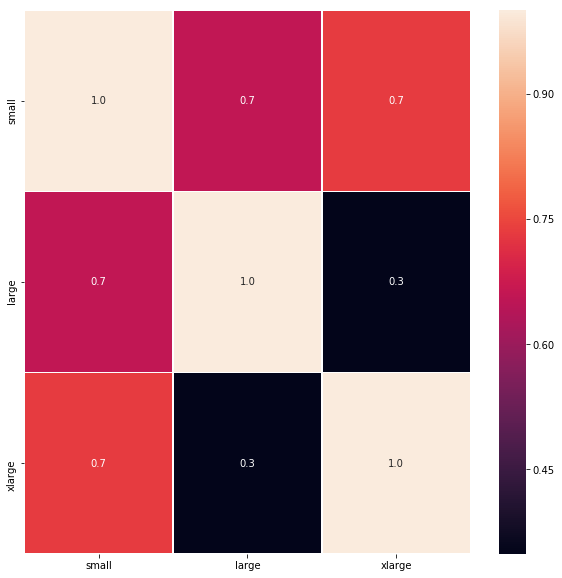

In [84]:
# 가방 크기에 따른 상곤관계
f,ax2=plt.subplots(figsize=(10,10))
sns.heatmap(df5.corr(),annot=True, linewidth=.5, fmt='.1f',ax=ax2)
plt.show()

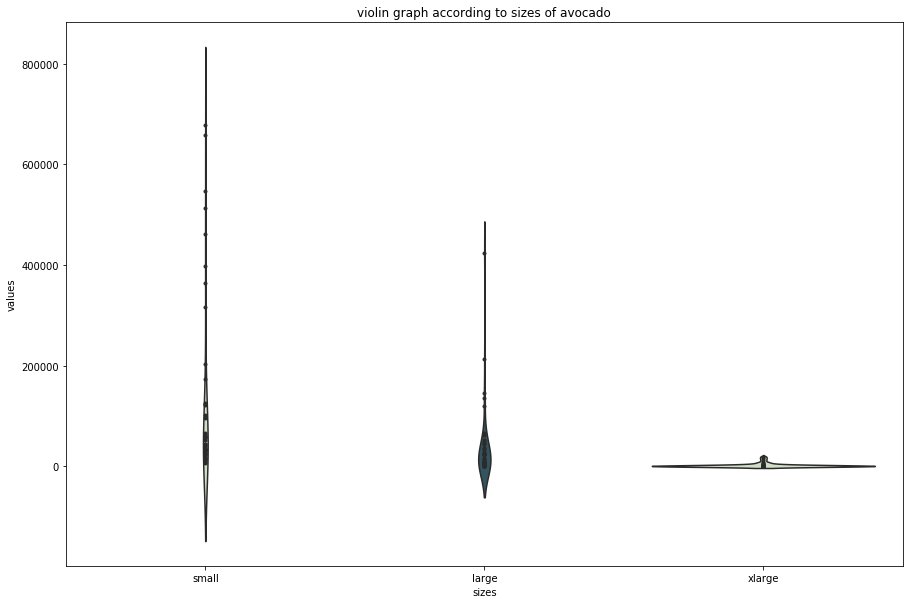

In [85]:
# 가방 크게이 따라 아보카도 가격
pal=sns.cubehelix_palette(2,rot=-.5,dark=.3)
plt.figure(figsize=(15,10))
sns.violinplot(data=df5, palette=pal, inner='points')
plt.xlabel('sizes')
plt.ylabel('values')
plt.title('violin graph according to sizes of avocado')

plt.show()

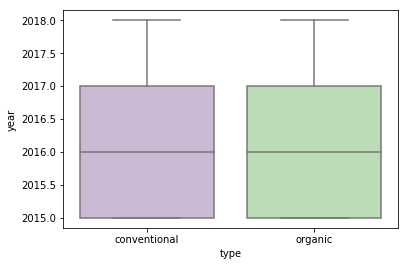

In [86]:
sns.boxplot(x="type", y="year" ,data=data, palette="PRGn")
plt.show()

In [0]:
region_list=list(data.region.unique())
sorted_data['area_averageprice_ratio']=sorted_data['area_averageprice_ratio']/max(sorted_data['area_averageprice_ratio'])
sorted_data2['area_totalvolume_ratio']=sorted_data2['area_totalvolume_ratio']/max(sorted_data2['area_totalvolume_ratio'])
new_data=pd.concat([sorted_data,sorted_data2['area_totalvolume_ratio']],axis=1)
new_data.sort_values('area_averageprice_ratio',inplace=True)

f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list',y='area_averageprice_ratio',data=new_data,color='lime',alpha=0.5)
sns.pointplot(x='area_list',y='area_totalvolume_ratio',data=new_data,color='green',alpha=0.5)
plt.text(40,0.3,'average price ratio',color='green',fontsize = 17,style = 'italic')
plt.text(30,0.7,'total volume ratio',color='lime',fontsize = 17,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.xticks(rotation= 90)

plt.title('Average Price  VS  Total Volume',fontsize = 20,color='blue')